In [76]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

In [3]:
# Import the dataset and verify it loaded correctly
housing_df = pd.read_csv("melb_data.csv")

housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [8]:
# We only want to focus on houses and townhouses
print(housing_df['Type'].unique())
housing_df.loc[(housing_df['Type']=='h') | (housing_df['Type']=='t'),:]

['h' 'u' 't']


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
# Let's check for missing values
housing_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# Let's view the numerical variables descriptive statistics
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [16]:
# Get the range of dates
print(housing_df['Date'].tail())
print("We can see that the date range is in the format 'DD/MM/YY'")
print(f" The date range is: {housing_df['Date'].min()}-{housing_df['Date'].max()}")

13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, dtype: object
We can see that the date range is in the format 'DD/MM/YY'
 The date range is: 1/07/2017-9/09/2017


In [20]:
# Let's begin making some corrections to the data

# Create a new copy of the dataset to modify
housing_cleaned = housing_df.copy()
# Adjust the date column to American format MM/DD/YY
housing_cleaned.loc[:,'Date'] = pd.to_datetime(housing_cleaned.loc[:,'Date'], format="%d/%m/%Y")
# Print the date range
print(f" The date range is: {housing_cleaned['Date'].min()} - {housing_cleaned['Date'].max()}")

 The date range is: 2016-01-28 00:00:00 - 2017-09-23 00:00:00


In [21]:
housing_cleaned

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03 00:00:00,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04 00:00:00,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04 00:00:00,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04 00:00:00,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04 00:00:00,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26 00:00:00,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26 00:00:00,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26 00:00:00,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26 00:00:00,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [66]:
# Now, we will drop columns that contain missing values
housing_dropped = housing_cleaned.copy()
housing_dropped = housing_dropped.drop(columns=['CouncilArea'])
housing_dropped = housing_dropped.dropna(axis=1)
housing_dropped.shape

(13580, 17)

In [67]:
numeric_cols = housing_dropped.select_dtypes(include=['float64']).columns
print(numeric_cols)
corr_matrix = housing_dropped.loc[:,numeric_cols].corr()

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')


In [68]:
#Only use houses and townhouses (no apartments)
housing_dropped = housing_dropped.loc[(housing_dropped['Type']=='h') | (housing_dropped['Type']=='t'),:]

In [123]:
# Now that we have dropped missing values, let's convert the Lat and Lon columns to an object type
housing_dropped = housing_dropped.rename(columns={'Lattitude': 'Latitude','Longtitude': 'Longitude'})
cols_to_convert = ['Latitude', 'Longitude', 'Postcode']
for col in cols_to_convert:
    housing_dropped[col] = housing_dropped[col].astype('object')

In [124]:
housing_dropped.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode          object
Bedroom2         float64
Bathroom         float64
Landsize         float64
Latitude          object
Longitude         object
Regionname        object
Propertycount    float64
dtype: object

In [130]:
housing_dropped.shape

(10563, 17)

<Axes: xlabel='Price', ylabel='Count'>

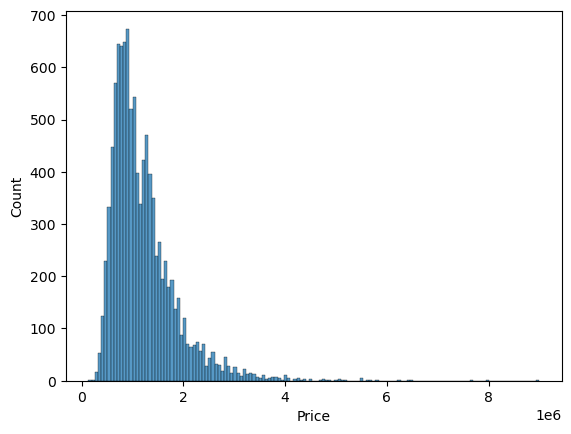

In [54]:
# Create a histogram plot of Price
sns.histplot(data=housing_dropped['Price'])

<Axes: ylabel='Price'>

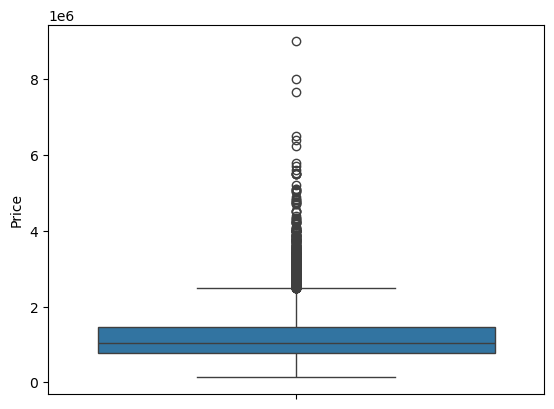

In [53]:
# Create a boxplot of Price
sns.boxplot(data=housing_dropped['Price'])

In [51]:
print(f"The skew of Price is: {housing_dropped['Price'].skew()}")
print(f"The kurtosis of Price is: {housing_dropped['Price'].kurtosis()}")

The skew of Price is: 2.2534340892543265
The kurtosis of Price is: 10.006420101774543


In [44]:
# Let's apply a logarithmic transformation to the Price column
housing_dropped['Price_log'] = np.log(housing_dropped['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

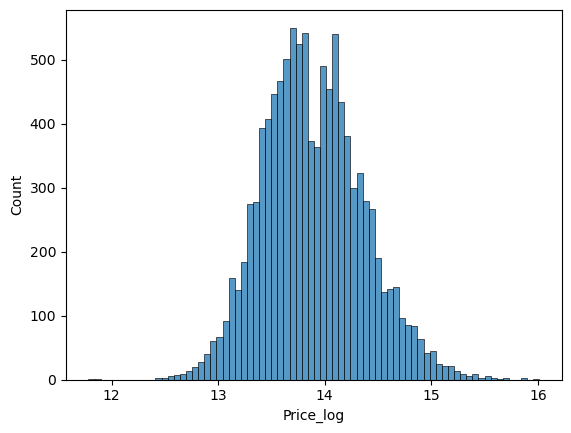

In [52]:
# Create a histogram plot of Price Log
sns.histplot(data=housing_dropped['Price_log'])

<Axes: ylabel='Price_log'>

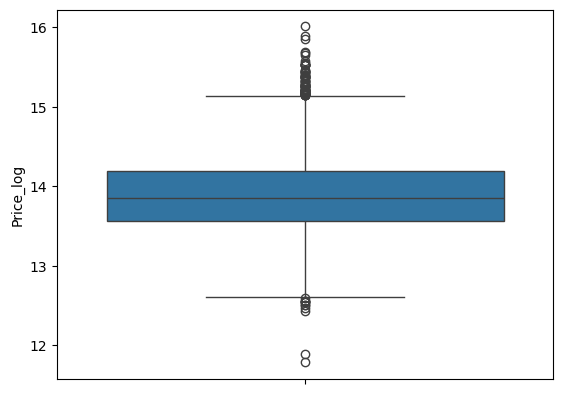

In [47]:
sns.boxplot(data=housing_dropped['Price_log'])

In [50]:
print(f"The skew of Price_log is: {housing_dropped['Price_log'].skew()} and the kurtosis is: {housing_dropped['Price_log'].kurtosis()}")

The skew of Price_log is: 0.2962661266568442 and the kurtosis is: 0.15100036449776644


In [48]:
housing_dropped.Suburb.value_counts()

Suburb
Reservoir         280
Bentleigh East    215
Preston           215
Brunswick         180
Coburg            173
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: count, Length: 314, dtype: int64

In [81]:
# Remove the outliers from Price using InterQuartile Range(IQR)
# Calculate the first quantile
Q1 = housing_dropped['Price'].quantile(0.25)
# Calculate the third quantile
Q3 = housing_dropped['Price'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Define the upper and lower bounds
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
housing_dropped_iqr = housing_dropped.loc[(housing_dropped['Price'] >= lower_bound) & (housing_dropped['Price'] <= upper_bound), :]
print(f"Shape of dataset after dropping outliers in Price: {housing_dropped.shape}")

Shape of dataset after dropping outliers in Price: (10563, 17)


<Axes: xlabel='Price', ylabel='Count'>

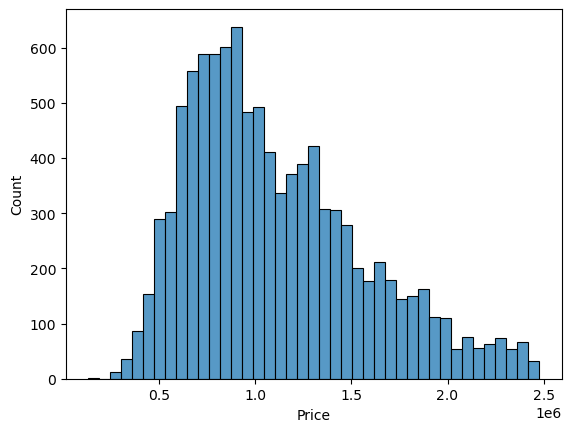

In [82]:
# Create a histogram plot of Price Log
sns.histplot(data=housing_dropped_iqr['Price'])

<Axes: ylabel='Price'>

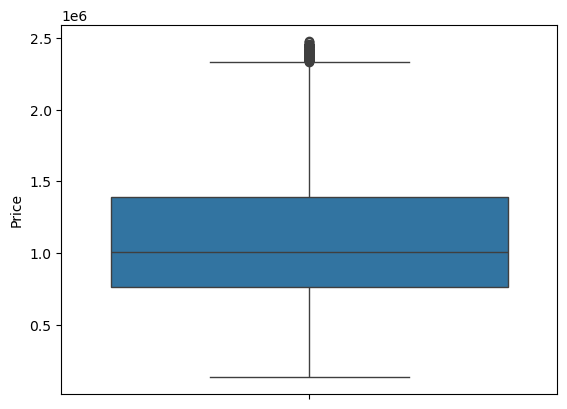

In [84]:
sns.boxplot(data=housing_dropped_iqr['Price'])

In [105]:
# Calculate the zscore
zscores = zscore(housing_dropped['Price'])

# Set the threshold for 3 standard deviations
threshold = 3 

housing_no_outliers = housing_dropped.loc[np.abs(zscores) < threshold].copy()
print(f"There are {housing_no_outliers.shape[0]} rows and {housing_no_outliers.shape[1]} columns.")

# Create a log of Price
housing_no_outliers['Price_log'] = np.log(housing_no_outliers['Price'])

There are 10380 rows and 17 columns.


<Axes: xlabel='Price', ylabel='Count'>

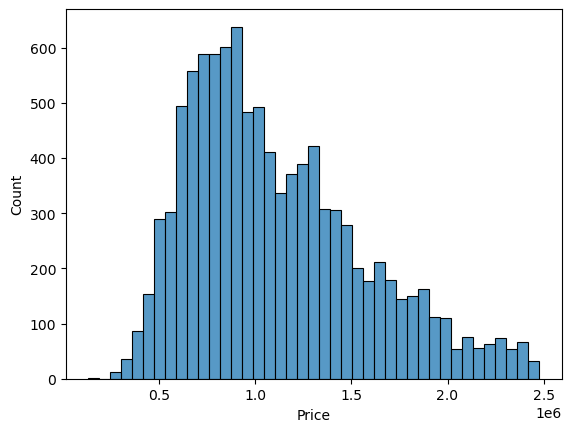

In [86]:
# Create a histplot
sns.histplot(data=housing_dropped_iqr['Price'])

<Axes: ylabel='Price'>

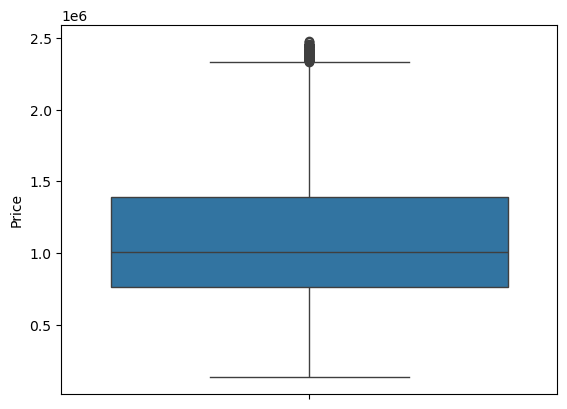

In [87]:
# Create a boxplot
sns.boxplot(data=housing_dropped_iqr['Price'])

In [89]:
# Let's apply a logarithmic transformation to the Price column
housing_dropped_iqr.loc[:,'Price_log'] = np.log(housing_dropped_iqr.loc[:,'Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

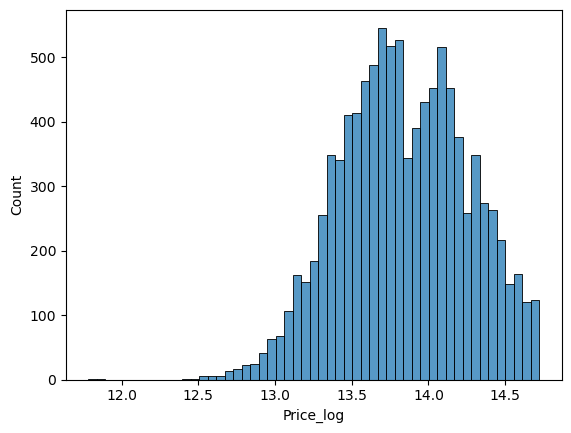

In [90]:
# Create a histplot
sns.histplot(data=housing_dropped_iqr['Price_log'])

<Axes: ylabel='Price_log'>

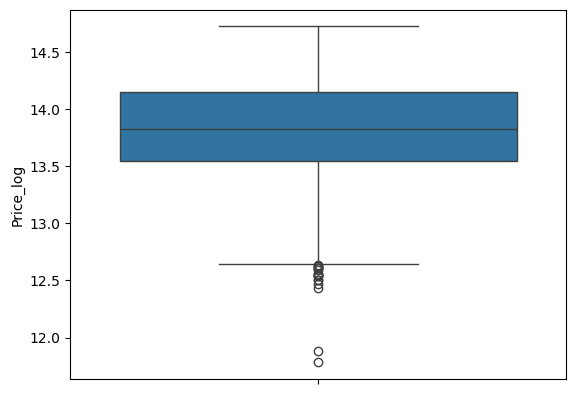

In [91]:
# Create a boxplot
sns.boxplot(data=housing_dropped_iqr['Price_log'])

In [122]:
# Create a bar plot of selling price by suburb
suburb_counts = housing_dropped_iqr['Suburb'].value_counts()

# Sort the suburbs by number of properties
suburb_counts

Suburb
Reservoir             280
Bentleigh East        215
Preston               215
Brunswick             178
Coburg                173
Richmond              164
Northcote             153
Yarraville            148
Pascoe Vale           146
Essendon              144
Glenroy               141
Balwyn North          137
Newport               130
Glen Iris             129
Moonee Ponds          120
Keilor East           115
Bentleigh             112
Ascot Vale            108
Brighton East         107
Sunshine              104
Doncaster             100
Thornbury              98
Fawkner                94
Kew                    92
Brighton               90
Templestowe Lower      89
West Footscray         88
Footscray              87
Surrey Hills           85
Malvern East           85
Port Melbourne         85
Maidstone              84
Sunshine West          83
Williamstown           83
Hampton                77
Carnegie               76
Kensington             76
Maribyrnong            75
Bruns

In [129]:
housing_dropped_iqr.groupby('SellerG')['Price'].mean().head(20)

SellerG
@Realty         6.120000e+05
ASL             1.221375e+06
Abercromby's    1.541167e+06
Ace             7.200000e+05
Alexkarbon      1.052520e+06
Allens          1.106700e+06
Appleby         7.960000e+05
Aquire          5.060000e+05
Area            7.700000e+05
Ascend          1.690050e+06
Ash             8.100000e+05
Asset           7.825000e+05
Assisi          8.260000e+05
Australian      1.012000e+06
Barlow          1.015711e+06
Barry           9.107423e+05
Bayside         9.100000e+05
Bekdon          1.439500e+06
Beller          1.050333e+06
Bells           7.114875e+05
Name: Price, dtype: float64